In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('CompleteDataset.csv')

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.dtypes

Unnamed: 0               int64
Name                    object
Age                      int64
Photo                   object
Nationality             object
Flag                    object
Overall                  int64
Potential                int64
Club                    object
Club Logo               object
Value                   object
Wage                    object
Special                  int64
Acceleration            object
Aggression              object
Agility                 object
Balance                 object
Ball control            object
Composure               object
Crossing                object
Curve                   object
Dribbling               object
Finishing               object
Free kick accuracy      object
GK diving               object
GK handling             object
GK kicking              object
GK positioning          object
GK reflexes             object
Heading accuracy        object
                        ...   
Vision                  object
Volleys 

In [6]:
def convert_to_num(val):
    try:
        float(val)
        return False
    
    except ValueError:
        return True    

In [7]:
pd.to_numeric(df, 'coerce')

TypeError: arg must be a list, tuple, 1-d array, or Series

In [8]:
df.select_dtypes(include=object).columns

Index(['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Value',
       'Wage', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'Preferred Positions'],
      dtype='object')

In [9]:
def money_val(val):
    if val[-1] == 'M':
        val = int(float(val[1:-1])*10**6)
    
    elif val[-1] == 'K':
        val = int(float(val[1:-1]) * 10**3)
    
    else:
        val = int(val[1:])
    
    return val

In [10]:
df.Wage.apply(lambda x: x[0]).unique()

array(['€'], dtype=object)

In [11]:
df['Value_new'] = df.Value.apply(money_val)

In [12]:
df['Wage_new'] = df.Wage.apply(money_val)

In [13]:
obj_cols = ['Acceleration', 'Aggression', 'Agility', 'Balance',
            'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
            'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
            'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
            'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
            'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
            'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
            'Strength', 'Vision', 'Volleys']

In [14]:
for col in obj_cols:
    df[col] = df[col].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    

In [15]:
df.drop(['Photo', 'Flag', 'Club Logo'], axis=1)

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,RCM,RDM,RF,RM,RS,RW,RWB,ST,Value_new,Wage_new
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,...,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,95500000,565000
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,...,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,105000000,565000
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,...,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,123000000,280000
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,...,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,97000000,510000
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61000000,230000
5,5,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,€92M,€355K,2143,...,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0,92000000,355000
6,6,De Gea,26,Spain,90,92,Manchester United,€64.5M,€215K,1458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64500000,215000
7,7,E. Hazard,26,Belgium,90,91,Chelsea,€90.5M,€295K,2096,...,81.0,61.0,87.0,87.0,82.0,88.0,64.0,82.0,90500000,295000
8,8,T. Kroos,27,Germany,90,90,Real Madrid CF,€79M,€340K,2165,...,87.0,82.0,81.0,81.0,77.0,80.0,78.0,77.0,79000000,340000
9,9,G. Higuaín,29,Argentina,90,90,Juventus,€77M,€275K,1961,...,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0,77000000,275000


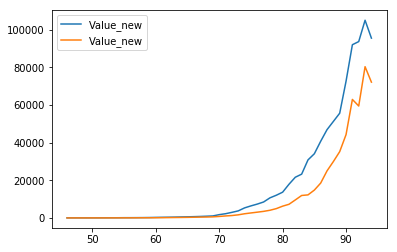

In [16]:
overall_groupby = df.groupby('Overall')
potential_groupby = df.groupby('Potential')
#overall_groupby['Value_new'].apply(lambda x: x.mean()/1000).plot(legend='Value, in thds €', color='red')
plt.plot(overall_groupby.groups.keys(), overall_groupby['Value_new'].apply(lambda x: x.mean()/1000),
                                        potential_groupby['Value_new'].apply(lambda x: x.mean()/1000))
plt.legend()

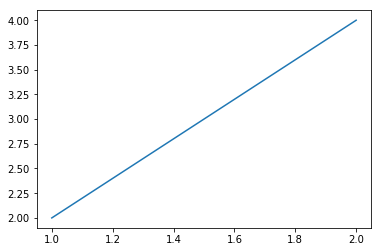

In [17]:
plt.plot([1, 2], [2,4])

In [19]:
overall_groupby_mean = pd.DataFrame(overall_groupby['Value_new'].apply(lambda x: x.mean()/1000))
overall_groupby_mean['Margin_overall_value'] = overall_groupby_mean - overall_groupby_mean.shift(1)

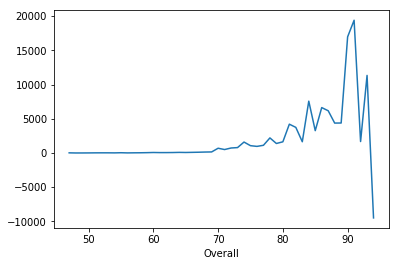

In [20]:
overall_groupby_mean.Margin_overall_value.plot()

<BarContainer object of 10 artists>

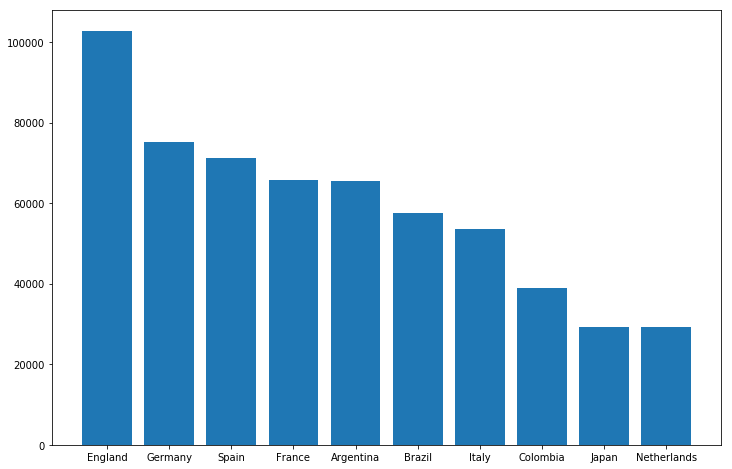

In [21]:
nation_overall = df.groupby('Nationality')['Overall'].sum().sort_values(ascending=False)[:10]
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(nation_overall.index, nation_overall.values)


(2000, 2774.1)

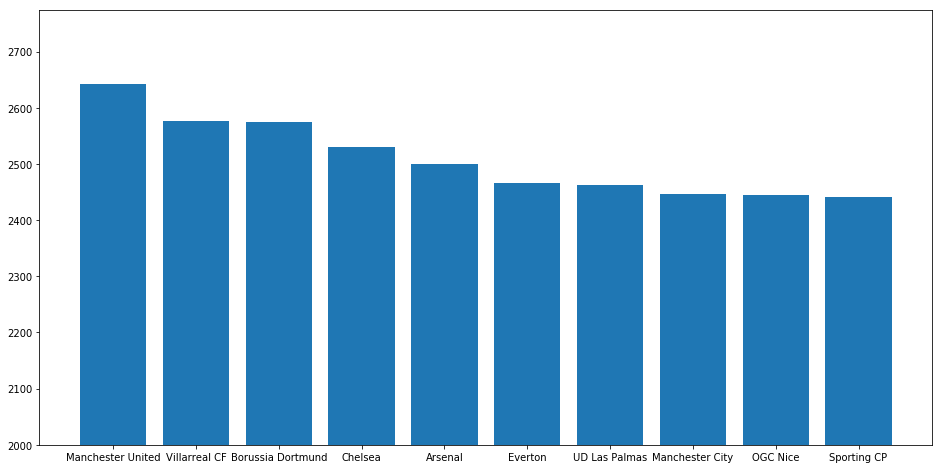

In [22]:
club_overall = df.groupby('Club')['Overall'].sum().sort_values(ascending=False)[:10]
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(club_overall.index, club_overall.values, align='center')
ax.set_ylim(2000)

In [23]:
a = df.groupby('Club')['Overall']


In [24]:
def func(group):
    return group.sort_values(ascending=False)[:22].sum()


In [25]:
b = a.apply(func).sort_values(ascending=False)[:15]
b/22

Club
FC Barcelona           83.636364
Real Madrid CF         83.545455
Juventus               83.500000
Chelsea                82.727273
FC Bayern Munich       82.681818
Manchester United      82.500000
Atlético Madrid        81.954545
Paris Saint-Germain    81.909091
Arsenal                81.590909
Manchester City        81.272727
Borussia Dortmund      81.181818
Tottenham Hotspur      80.363636
Roma                   79.909091
Liverpool              79.818182
Napoli                 79.818182
Name: Overall, dtype: float64

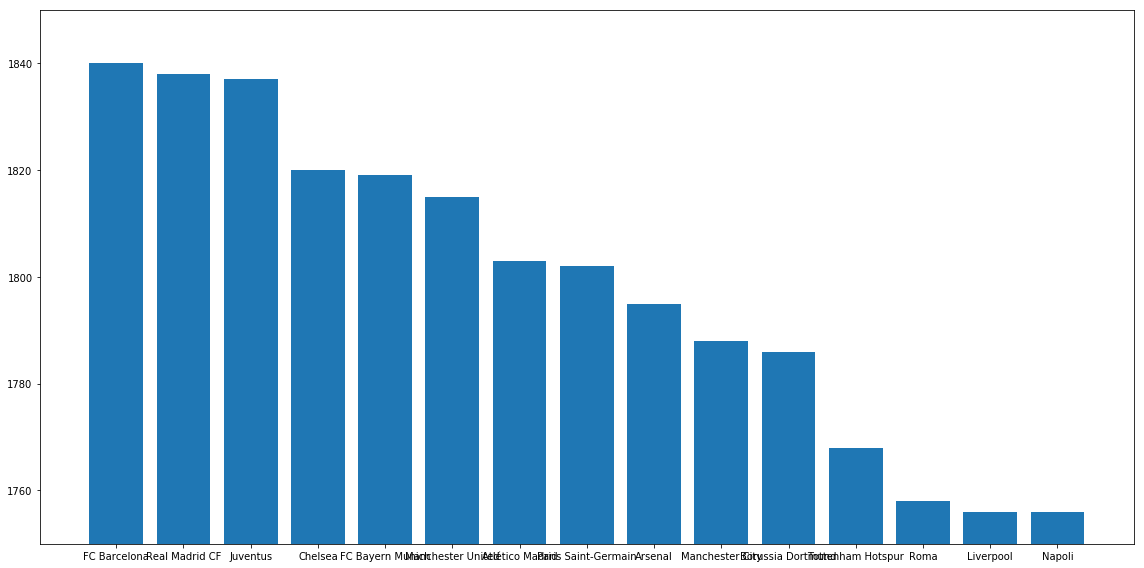

In [26]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(b.index, b.values, align='center')
ax.set_ylim(1750, 1850)
plt.tight_layout()

AttributeError: 'Int64Index' object has no attribute 'lower'

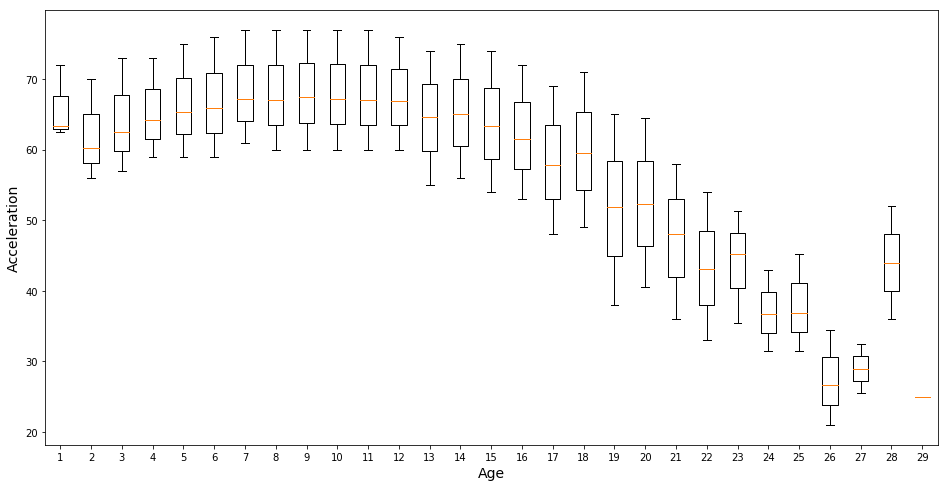

In [60]:
age_acceleration = df.groupby('Age')['Acceleration'].describe()#[['25%', '75%', 'mean']]
fig, ax = plt.subplots(figsize=(16, 8))
ax.boxplot(age_acceleration[['25%', '75%', 'mean']], )

ax.set_ylabel('Acceleration', fontdict={'size':14})
ax.set_xlabel('Age', fontdict={'size':14})


In [59]:
age_acceleration.transpose().shape

(8, 29)

In [76]:
#age_acceleration.drop(['count', 'std'], axis=1).transpose().boxplot(figsize=(16, 8))
df.groupby('Age')['Acceleration'].boxplot(figsize=(16, 8))

AttributeError: 'SeriesGroupBy' object has no attribute 'boxplot'

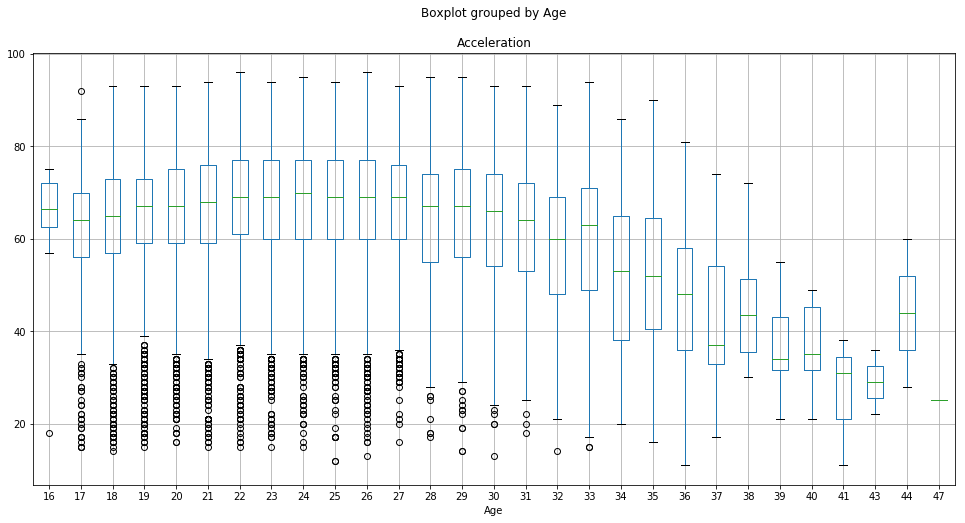

In [78]:
df.boxplot('Acceleration', by='Age', figsize=(16,8))

In [83]:
df.loc[df.Age == 44]

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RCM,RDM,RF,RM,RS,RW,RWB,ST,Value_new,Wage_new
4839,4839,O. Pérez,44,https://cdn.sofifa.org/48/18/players/140029.png,Mexico,https://cdn.sofifa.org/flags/83.png,71,71,Pachuca,https://cdn.sofifa.org/24/18/teams/110147.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160000,9000
5314,5314,E. El Hadary,44,https://cdn.sofifa.org/48/18/players/188033.png,Egypt,https://cdn.sofifa.org/flags/111.png,70,70,Al Taawoun,https://cdn.sofifa.org/24/18/teams/112393.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120000,7000
